In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/03_Mar.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,17.000000,75.000000,1,4,1,1844.0,1891.0,1964.0,1719.0,1540.0,1670.0,1856.416667,1713.0
1,16.916667,74.583333,1,4,1,1787.0,1879.0,1933.0,1679.0,1533.0,1680.0,1834.916667,1675.0
2,16.833333,74.166667,1,4,1,1789.0,1919.0,1950.0,1665.0,1520.0,1664.0,1812.083333,1676.0
3,16.750000,73.750000,1,4,1,1754.0,1885.0,1933.0,1645.0,1500.0,1636.0,1785.333333,1612.0
4,16.666667,73.333333,2,4,1,1713.0,1844.0,1891.0,1614.0,1482.0,1591.0,1763.000000,1623.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,20.532452,58.908200,23,1,0,2076.0,2081.0,2215.0,2300.0,2348.0,2270.0,2085.833333,2094.0
8924,20.532452,58.908200,24,1,0,2064.0,1914.0,2200.0,2274.0,2325.0,2273.0,2075.333333,2074.0
8925,20.532452,58.908200,24,1,0,2099.0,1985.0,2186.0,2248.0,2289.0,2244.0,2064.000000,2050.0
8926,20.200000,58.908200,24,1,0,2119.0,2039.0,2173.0,2205.0,2224.0,2192.0,2050.083333,2006.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   int64  
 3   B       8928 non-null   int64  
 4   C       8928 non-null   int64  
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 906.9 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   float64
 3   B       8928 non-null   float64
 4   C       8928 non-null   float64
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(13)
memory usage: 906.9 KB


In [6]:
T = 11
HORIZON = 1


In [7]:
train = stlf_data.copy()[stlf_data.index <= 7392][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-0.888406,-0.824690,0.930411,-1.660902,-0.072393,0.632605,-0.426118,-0.259207,-0.000590,-0.840710,-1.481862,-0.949352,-0.398309
1,-1.021982,-0.838994,0.906669,-1.660902,-0.072393,0.632605,-0.626828,-0.301509,-0.109995,-0.985906,-1.508065,-0.911186,-0.477258
2,-1.018467,-0.853299,0.882927,-1.660902,-0.072393,0.632605,-0.619786,-0.160502,-0.049999,-1.036724,-1.556729,-0.972251,-0.561103
3,-1.243436,-0.867604,0.859184,-1.660902,-0.072393,0.632605,-0.743029,-0.280358,-0.109995,-1.109322,-1.631595,-1.079117,-0.659331
4,-1.204769,-0.881908,0.835442,-1.516457,-0.072393,0.632605,-0.887399,-0.424890,-0.258220,-1.221849,-1.698975,-1.250864,-0.741340


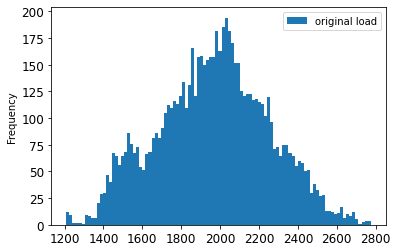

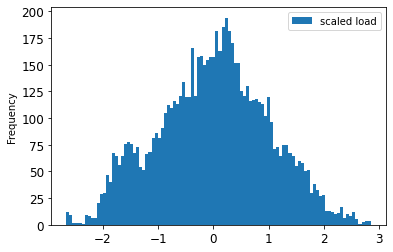

In [9]:
stlf_data[stlf_data.index <= 7392][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 7392][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

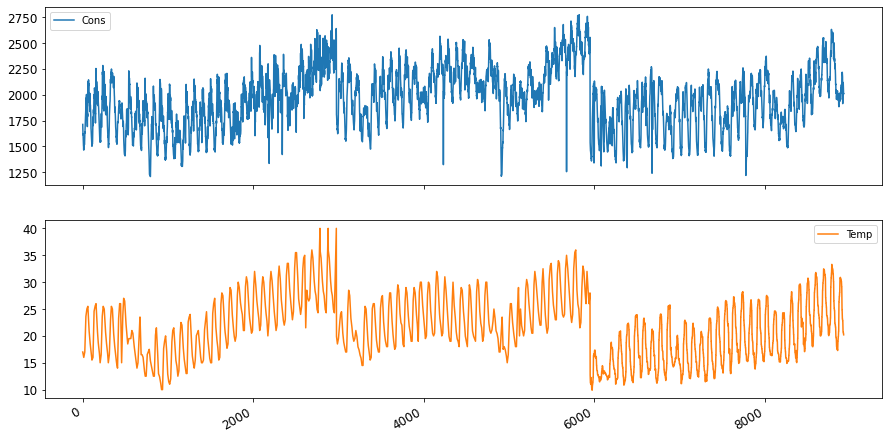

In [10]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [11]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+100'] = train_shifted['Cons'].shift(-100)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
0,-0.888406,-0.824690,0.930411,-1.660902,-0.072393,0.632605,-0.426118,-0.259207,-0.000590,-0.840710,-1.481862,-0.949352,-0.398309,-1.166103
1,-1.021982,-0.838994,0.906669,-1.660902,-0.072393,0.632605,-0.626828,-0.301509,-0.109995,-0.985906,-1.508065,-0.911186,-0.477258,-1.250466
2,-1.018467,-0.853299,0.882927,-1.660902,-0.072393,0.632605,-0.619786,-0.160502,-0.049999,-1.036724,-1.556729,-0.972251,-0.561103,-1.306709
3,-1.243436,-0.867604,0.859184,-1.660902,-0.072393,0.632605,-0.743029,-0.280358,-0.109995,-1.109322,-1.631595,-1.079117,-0.659331,-1.352406
4,-1.204769,-0.881908,0.835442,-1.516457,-0.072393,0.632605,-0.887399,-0.424890,-0.258220,-1.221849,-1.698975,-1.250864,-0.741340,-1.426224
5,-1.313739,-0.896213,0.811699,-1.516457,-0.072393,0.632605,-1.021206,-0.625825,-0.300570,-1.330746,-1.788815,-1.380629,-0.829163,-1.482466
6,-1.419194,-0.910517,0.787957,-1.516457,-0.072393,0.632605,-1.017685,-0.618774,-0.159403,-1.396084,-1.893629,-1.525661,-0.938407,-1.475436
7,-1.521133,-0.924822,0.764215,-1.516457,-0.072393,0.632605,-1.243044,-0.742155,-0.279395,-1.468682,-1.927319,-1.495128,-1.046121,-1.559800
8,-1.619557,-0.939126,0.740472,-1.372011,-0.072393,0.632605,-1.204310,-0.886687,-0.424091,-1.450532,-1.975982,-1.498944,-1.149856,-1.630103
9,-1.623072,-0.953431,0.716730,-1.372011,-0.072393,0.632605,-1.313468,-1.020644,-0.625254,-1.508611,-2.005929,-1.483678,-1.236456,-1.549254


In [12]:
for t in range(1, T+1):
    train_shifted['Cons_t-'+str(T-t)] = train_shifted['Cons'].shift(T-t)
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
0,-0.888406,-0.824690,0.930411,-1.660902,-0.072393,0.632605,-0.426118,-0.259207,-0.000590,-0.840710,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.888406
1,-1.021982,-0.838994,0.906669,-1.660902,-0.072393,0.632605,-0.626828,-0.301509,-0.109995,-0.985906,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.888406,-1.021982
2,-1.018467,-0.853299,0.882927,-1.660902,-0.072393,0.632605,-0.619786,-0.160502,-0.049999,-1.036724,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.888406,-1.021982,-1.018467
3,-1.243436,-0.867604,0.859184,-1.660902,-0.072393,0.632605,-0.743029,-0.280358,-0.109995,-1.109322,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.888406,-1.021982,-1.018467,-1.243436
4,-1.204769,-0.881908,0.835442,-1.516457,-0.072393,0.632605,-0.887399,-0.424890,-0.258220,-1.221849,...,NaN,NaN,NaN,NaN,NaN,-0.888406,-1.021982,-1.018467,-1.243436,-1.204769
5,-1.313739,-0.896213,0.811699,-1.516457,-0.072393,0.632605,-1.021206,-0.625825,-0.300570,-1.330746,...,NaN,NaN,NaN,NaN,-0.888406,-1.021982,-1.018467,-1.243436,-1.204769,-1.313739
6,-1.419194,-0.910517,0.787957,-1.516457,-0.072393,0.632605,-1.017685,-0.618774,-0.159403,-1.396084,...,NaN,NaN,NaN,-0.888406,-1.021982,-1.018467,-1.243436,-1.204769,-1.313739,-1.419194
7,-1.521133,-0.924822,0.764215,-1.516457,-0.072393,0.632605,-1.243044,-0.742155,-0.279395,-1.468682,...,NaN,NaN,-0.888406,-1.021982,-1.018467,-1.243436,-1.204769,-1.313739,-1.419194,-1.521133
8,-1.619557,-0.939126,0.740472,-1.372011,-0.072393,0.632605,-1.204310,-0.886687,-0.424091,-1.450532,...,NaN,-0.888406,-1.021982,-1.018467,-1.243436,-1.204769,-1.313739,-1.419194,-1.521133,-1.619557
9,-1.623072,-0.953431,0.716730,-1.372011,-0.072393,0.632605,-1.313468,-1.020644,-0.625254,-1.508611,...,-0.888406,-1.021982,-1.018467,-1.243436,-1.204769,-1.313739,-1.419194,-1.521133,-1.619557,-1.623072


In [13]:
# For debugging why val_loss gives NaN
train_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7383,-0.709133,-1.107499,1.179844,1.372460,0.938375,0.632605,-0.186674,0.170865,0.338211,-0.659215,...,0.285654,0.166139,0.057169,-0.020164,-0.108043,-0.188891,-0.318952,-0.575558,-0.751315,-0.709133
7384,-0.758345,-1.107499,1.179844,1.516906,0.938375,0.632605,-0.316960,0.061584,0.398207,-0.691884,...,0.166139,0.057169,-0.020164,-0.108043,-0.188891,-0.318952,-0.575558,-0.751315,-0.709133,-0.758345
7385,-0.709133,-1.107499,1.179844,1.516906,0.938375,0.632605,-0.574010,-0.015970,0.352327,-0.695514,...,0.057169,-0.020164,-0.108043,-0.188891,-0.318952,-0.575558,-0.751315,-0.709133,-0.758345,-0.709133
7386,-0.589618,-1.117798,1.186827,1.516906,0.938375,0.632605,-0.750071,-0.104099,0.292331,-0.564838,...,-0.020164,-0.108043,-0.188891,-0.318952,-0.575558,-0.751315,-0.709133,-0.758345,-0.709133,-0.589618
7387,-0.649376,-1.128098,1.193809,1.516906,0.938375,0.632605,-0.707817,-0.185178,0.172339,-0.597507,...,-0.108043,-0.188891,-0.318952,-0.575558,-0.751315,-0.709133,-0.758345,-0.709133,-0.589618,-0.649376
7388,-0.740770,-1.128098,1.193809,1.661352,0.938375,0.632605,-0.757114,-0.315609,0.062935,-0.749963,...,-0.188891,-0.318952,-0.575558,-0.751315,-0.709133,-0.758345,-0.709133,-0.589618,-0.649376,-0.740770
7389,-0.825133,-1.128098,1.193809,1.661352,0.938375,0.632605,-0.707817,-0.572947,-0.014707,-0.862489,...,-0.318952,-0.575558,-0.751315,-0.709133,-0.758345,-0.709133,-0.589618,-0.649376,-0.740770,-0.825133
7390,-0.979800,-1.208775,1.193809,1.661352,0.938375,0.632605,-0.588095,-0.749206,-0.102936,-0.993166,...,-0.575558,-0.751315,-0.709133,-0.758345,-0.709133,-0.589618,-0.649376,-0.740770,-0.825133,-0.979800
7391,-1.092285,-1.208775,1.226123,1.661352,0.938375,0.632605,-0.647956,-0.706904,-0.184107,-1.120212,...,-0.751315,-0.709133,-0.758345,-0.709133,-0.589618,-0.649376,-0.740770,-0.825133,-0.979800,-1.092285
7392,-1.211800,-1.208775,1.226123,-1.660902,1.443758,-1.580765,-0.739508,-0.756256,-0.314687,-1.461422,...,-0.709133,-0.758345,-0.709133,-0.589618,-0.649376,-0.740770,-0.825133,-0.979800,-1.092285,-1.211800


In [14]:
#One Nan value on 5699, filled with linear interpolation
train_shifted = train_shifted.dropna(how='any')

In [15]:
train_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7283,-0.280285,-1.001073,1.503704,1.228014,0.432991,0.632605,0.073897,0.400001,0.189985,-0.140140,...,0.278624,0.394624,0.461412,0.313775,0.229412,0.071230,0.155594,0.057169,-0.111558,-0.280285
7284,-0.336527,-1.001073,1.503704,1.372460,0.432991,0.632605,0.158407,0.466979,0.253510,-0.463201,...,0.394624,0.461412,0.313775,0.229412,0.071230,0.155594,0.057169,-0.111558,-0.280285,-0.336527
7285,-0.413861,-1.001073,1.503704,1.372460,0.432991,0.632605,0.059812,0.318922,0.147635,-0.416012,...,0.461412,0.313775,0.229412,0.071230,0.155594,0.057169,-0.111558,-0.280285,-0.336527,-0.413861
7286,-0.695073,-1.134964,1.622771,1.372460,0.432991,0.632605,-0.109207,0.234318,0.285273,-0.557578,...,0.313775,0.229412,0.071230,0.155594,0.057169,-0.111558,-0.280285,-0.336527,-0.413861,-0.695073
7287,-0.691558,-1.268855,1.741838,1.372460,0.432991,0.632605,-0.278226,0.075685,0.401736,-0.728183,...,0.229412,0.071230,0.155594,0.057169,-0.111558,-0.280285,-0.336527,-0.413861,-0.695073,-0.691558
7288,-0.723194,-1.268855,1.741838,1.516906,0.432991,0.632605,-0.334566,0.160289,0.468790,-0.757222,...,0.071230,0.155594,0.057169,-0.111558,-0.280285,-0.336527,-0.413861,-0.695073,-0.691558,-0.723194
7289,-0.726709,-1.268855,1.741838,1.516906,0.432991,0.632605,-0.412033,0.061584,0.320565,-0.702774,...,0.155594,0.057169,-0.111558,-0.280285,-0.336527,-0.413861,-0.695073,-0.691558,-0.723194,-0.726709
7290,-0.600164,-1.337516,1.799235,1.516906,0.432991,0.632605,-0.693732,-0.107624,0.235865,-0.612027,...,0.057169,-0.111558,-0.280285,-0.336527,-0.413861,-0.695073,-0.691558,-0.723194,-0.726709,-0.600164
7291,-0.631800,-1.406178,1.856631,1.516906,0.432991,0.632605,-0.690210,-0.276832,0.077052,-0.691884,...,-0.111558,-0.280285,-0.336527,-0.413861,-0.695073,-0.691558,-0.723194,-0.726709,-0.600164,-0.631800
7292,-0.779436,-1.406178,1.856631,1.661352,0.432991,0.632605,-0.721901,-0.333235,0.161752,-0.797151,...,-0.280285,-0.336527,-0.413861,-0.695073,-0.691558,-0.723194,-0.726709,-0.600164,-0.631800,-0.779436


In [16]:
y_train = train_shifted[['y_t+100']]
y_train


,y_t+100
10,-1.510588
11,-1.507072
12,-1.535194
13,-1.556284
14,-1.507072
...,...
7288,-0.740770
7289,-0.825133
7290,-0.979800
7291,-1.092285


In [17]:
X_train = train_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
10,-1.633618,-0.967735,0.692987,-1.372011,-0.072393,0.632605,-1.419105,-1.017119,-0.618196,-1.501351,-1.946035,-1.502761,-1.324585
11,-1.749618,-0.982040,0.669245,-1.372011,-0.072393,0.632605,-1.521221,-1.242730,-0.741717,-1.530390,-1.961009,-1.548560,-1.412103
12,-1.633618,-0.996345,0.645503,-1.227565,-0.072393,0.632605,-1.619816,-1.203953,-0.886413,-1.679216,-2.065822,-1.663059,-1.476976
13,-1.753133,-0.982040,0.626509,-1.227565,-0.072393,0.632605,-1.623337,-1.313233,-1.020522,-1.624767,-2.136945,-1.571460,-1.540625
14,-1.612527,-0.967735,0.607515,-1.227565,-0.072393,0.632605,-1.633901,-1.418989,-1.016993,-1.602988,-2.103255,-1.552377,-1.592339
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7288,-0.723194,-1.268855,1.741838,1.516906,0.432991,0.632605,-0.334566,0.160289,0.468790,-0.757222,-0.714479,-0.697455,-0.207974
7289,-0.726709,-1.268855,1.741838,1.516906,0.432991,0.632605,-0.412033,0.061584,0.320565,-0.702774,-0.628382,-0.674555,-0.298551
7290,-0.600164,-1.337516,1.799235,1.516906,0.432991,0.632605,-0.693732,-0.107624,0.235865,-0.612027,-0.725709,-0.628756,-0.370768
7291,-0.631800,-1.406178,1.856631,1.516906,0.432991,0.632605,-0.690210,-0.276832,0.077052,-0.691884,-0.763142,-0.590590,-0.431969


In [18]:
X_train=np.atleast_3d(X_train)
X_train.shape

(7283, 13, 1)

In [19]:
valid = stlf_data.copy()[(stlf_data.index >=7393) & (stlf_data.index <=8353)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7393,1584.0,14.762452,80.189580,1.0,7.0,0.0,1731.0,1764.0,1802.0,1530.0,1551.0,1534.0,1720.166667
7394,1575.0,14.257452,82.334425,1.0,7.0,0.0,1687.0,1798.0,1752.0,1507.0,1542.0,1504.0,1705.416667
7395,1558.0,13.752452,84.479270,1.0,7.0,0.0,1655.0,1781.0,1764.0,1530.0,1520.0,1516.0,1688.250000
7396,1550.0,13.752452,84.479270,2.0,7.0,0.0,1621.0,1755.0,1750.0,1508.0,1503.0,1499.0,1671.583333
7397,1534.0,13.752452,84.479270,2.0,7.0,0.0,1584.0,1731.0,1764.0,1488.0,1483.0,1490.0,1652.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8349,1874.0,18.282452,88.859230,24.0,2.0,1.0,1891.0,2006.0,2119.0,1673.0,1768.0,1946.0,1963.000000
8350,1863.0,18.522451,88.859230,24.0,2.0,1.0,1926.0,1971.0,2092.0,1630.0,1742.0,1912.0,1943.916667
8351,1835.0,18.522451,87.867065,24.0,2.0,1.0,1922.0,1940.0,2070.0,1611.0,1721.0,1869.0,1924.333333
8352,1752.0,18.522451,87.867065,1.0,3.0,1.0,1916.0,1909.0,2039.0,1599.0,1682.0,1815.0,1900.416667


In [20]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7393,-1.283844,-1.175629,0.879314,-1.658081,1.441195,-1.22847,-0.626235,-0.476839,-0.304854,-1.505034,-1.431265,-1.432321,-0.704697
7394,-1.323918,-1.288981,0.993375,-1.658081,1.441195,-1.22847,-0.821892,-0.325698,-0.527056,-1.606368,-1.470221,-1.558011,-0.773332
7395,-1.399612,-1.402333,1.107437,-1.658081,1.441195,-1.22847,-0.964188,-0.401269,-0.473727,-1.505034,-1.565445,-1.507735,-0.853212
7396,-1.435233,-1.402333,1.107437,-1.513750,1.441195,-1.22847,-1.115378,-0.516847,-0.535944,-1.601962,-1.639027,-1.578959,-0.930766
7397,-1.506476,-1.402333,1.107437,-1.513750,1.441195,-1.22847,-1.279908,-0.623535,-0.473727,-1.690079,-1.725594,-1.616666,-1.019953
7398,-1.564360,-1.413556,1.099686,-1.513750,1.441195,-1.22847,-1.319929,-0.819130,-0.322630,-1.663644,-1.734251,-1.599907,-1.127365
7399,-1.559907,-1.424779,1.091935,-1.513750,1.441195,-1.22847,-1.395524,-0.961381,-0.398178,-1.668050,-1.751564,-1.658562,-1.227797
7400,-1.648960,-1.424779,1.091935,-1.369419,1.441195,-1.22847,-1.431098,-1.112522,-0.513723,-1.831065,-1.829475,-1.692079,-1.325903
7401,-1.666770,-1.424779,1.091935,-1.369419,1.441195,-1.22847,-1.502247,-1.276999,-0.620380,-1.778195,-1.885744,-1.754924,-1.416253
7402,-1.706844,-1.569555,1.118036,-1.369419,1.441195,-1.22847,-1.560054,-1.317007,-0.815918,-1.817847,-1.924699,-1.842906,-1.493031


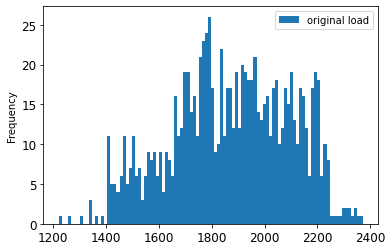

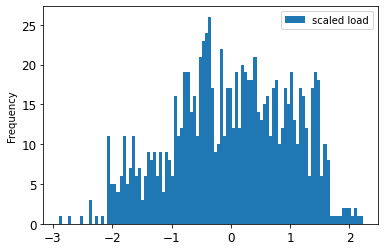

In [21]:
stlf_data[(stlf_data.index >=7393) & (stlf_data.index <=8353)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=7393) & (valid.index <=8353)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [22]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+100'] = valid_shifted['Cons'].shift(-100)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7393,-1.283844,-1.175629,0.879314,-1.658081,1.441195,-1.22847,-0.626235,-0.476839,-0.304854,-1.505034,-1.431265,-1.432321,-0.704697,-1.559907
7394,-1.323918,-1.288981,0.993375,-1.658081,1.441195,-1.22847,-0.821892,-0.325698,-0.527056,-1.606368,-1.470221,-1.558011,-0.773332,-1.439686
7395,-1.399612,-1.402333,1.107437,-1.658081,1.441195,-1.22847,-0.964188,-0.401269,-0.473727,-1.505034,-1.565445,-1.507735,-0.853212,-1.546549
7396,-1.435233,-1.402333,1.107437,-1.513750,1.441195,-1.22847,-1.115378,-0.516847,-0.535944,-1.601962,-1.639027,-1.578959,-0.930766,-1.604433
7397,-1.506476,-1.402333,1.107437,-1.513750,1.441195,-1.22847,-1.279908,-0.623535,-0.473727,-1.690079,-1.725594,-1.616666,-1.019953,-1.644507
7398,-1.564360,-1.413556,1.099686,-1.513750,1.441195,-1.22847,-1.319929,-0.819130,-0.322630,-1.663644,-1.734251,-1.599907,-1.127365,-1.822612
7399,-1.559907,-1.424779,1.091935,-1.513750,1.441195,-1.22847,-1.395524,-0.961381,-0.398178,-1.668050,-1.751564,-1.658562,-1.227797,-1.786991
7400,-1.648960,-1.424779,1.091935,-1.369419,1.441195,-1.22847,-1.431098,-1.112522,-0.513723,-1.831065,-1.829475,-1.692079,-1.325903,-1.751370
7401,-1.666770,-1.424779,1.091935,-1.369419,1.441195,-1.22847,-1.502247,-1.276999,-0.620380,-1.778195,-1.885744,-1.754924,-1.416253,-1.835970
7402,-1.706844,-1.569555,1.118036,-1.369419,1.441195,-1.22847,-1.560054,-1.317007,-0.815918,-1.817847,-1.924699,-1.842906,-1.493031,-1.791444


In [23]:
for t in range(1, T+1):
    valid_shifted['Cons_t-'+str(T-t)] = valid_shifted['Cons'].shift(T-t)
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7393,-1.283844,-1.175629,0.879314,-1.658081,1.441195,-1.22847,-0.626235,-0.476839,-0.304854,-1.505034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.283844
7394,-1.323918,-1.288981,0.993375,-1.658081,1.441195,-1.22847,-0.821892,-0.325698,-0.527056,-1.606368,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.283844,-1.323918
7395,-1.399612,-1.402333,1.107437,-1.658081,1.441195,-1.22847,-0.964188,-0.401269,-0.473727,-1.505034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.283844,-1.323918,-1.399612
7396,-1.435233,-1.402333,1.107437,-1.513750,1.441195,-1.22847,-1.115378,-0.516847,-0.535944,-1.601962,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.283844,-1.323918,-1.399612,-1.435233
7397,-1.506476,-1.402333,1.107437,-1.513750,1.441195,-1.22847,-1.279908,-0.623535,-0.473727,-1.690079,...,NaN,NaN,NaN,NaN,NaN,-1.283844,-1.323918,-1.399612,-1.435233,-1.506476
7398,-1.564360,-1.413556,1.099686,-1.513750,1.441195,-1.22847,-1.319929,-0.819130,-0.322630,-1.663644,...,NaN,NaN,NaN,NaN,-1.283844,-1.323918,-1.399612,-1.435233,-1.506476,-1.564360
7399,-1.559907,-1.424779,1.091935,-1.513750,1.441195,-1.22847,-1.395524,-0.961381,-0.398178,-1.668050,...,NaN,NaN,NaN,-1.283844,-1.323918,-1.399612,-1.435233,-1.506476,-1.564360,-1.559907
7400,-1.648960,-1.424779,1.091935,-1.369419,1.441195,-1.22847,-1.431098,-1.112522,-0.513723,-1.831065,...,NaN,NaN,-1.283844,-1.323918,-1.399612,-1.435233,-1.506476,-1.564360,-1.559907,-1.648960
7401,-1.666770,-1.424779,1.091935,-1.369419,1.441195,-1.22847,-1.502247,-1.276999,-0.620380,-1.778195,...,NaN,-1.283844,-1.323918,-1.399612,-1.435233,-1.506476,-1.564360,-1.559907,-1.648960,-1.666770
7402,-1.706844,-1.569555,1.118036,-1.369419,1.441195,-1.22847,-1.560054,-1.317007,-0.815918,-1.817847,...,-1.283844,-1.323918,-1.399612,-1.435233,-1.506476,-1.564360,-1.559907,-1.648960,-1.666770,-1.706844


In [24]:
valid_shifted = valid_shifted.dropna(how='any')

In [25]:
valid_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8244,-0.580329,-0.659372,0.862968,1.372873,-1.256834,-1.22847,-0.145984,-0.134549,-0.473727,-0.077549,...,-0.099445,-0.139519,-0.143971,-0.059371,-0.072729,-0.148424,-0.357698,-0.384413,-0.420034,-0.580329
8245,-0.611497,-0.659372,0.862968,1.372873,-1.256834,-1.22847,-0.354982,-0.138994,-0.580384,-0.156854,...,-0.139519,-0.143971,-0.059371,-0.072729,-0.148424,-0.357698,-0.384413,-0.420034,-0.580329,-0.611497
8246,-0.731718,-0.782824,1.018382,1.372873,-1.256834,-1.22847,-0.381663,-0.054533,-0.367070,-0.227347,...,-0.143971,-0.059371,-0.072729,-0.148424,-0.357698,-0.384413,-0.420034,-0.580329,-0.611497,-0.731718
8247,-0.820771,-0.906277,1.173796,1.372873,-1.256834,-1.22847,-0.417237,-0.067869,-0.091540,-0.412391,...,-0.059371,-0.072729,-0.148424,-0.357698,-0.384413,-0.420034,-0.580329,-0.611497,-0.731718,-0.820771
8248,-0.949897,-0.906277,1.173796,1.517204,-1.256834,-1.22847,-0.577320,-0.143439,-0.131536,-0.430014,...,-0.072729,-0.148424,-0.357698,-0.384413,-0.420034,-0.580329,-0.611497,-0.731718,-0.820771,-0.949897
8249,-0.905371,-0.906277,1.173796,1.517204,-1.256834,-1.22847,-0.608447,-0.352370,-0.135980,-0.407985,...,-0.148424,-0.357698,-0.384413,-0.420034,-0.580329,-0.611497,-0.731718,-0.820771,-0.949897,-0.905371
8250,-0.758434,-0.918622,1.213888,1.517204,-1.256834,-1.22847,-0.728510,-0.379042,-0.051543,-0.302246,...,-0.357698,-0.384413,-0.420034,-0.580329,-0.611497,-0.731718,-0.820771,-0.949897,-0.905371,-0.758434
8251,-0.705003,-0.930968,1.253980,1.517204,-1.256834,-1.22847,-0.817445,-0.414605,-0.064876,-0.284622,...,-0.384413,-0.420034,-0.580329,-0.611497,-0.731718,-0.820771,-0.949897,-0.905371,-0.758434,-0.705003
8252,-0.789602,-0.930968,1.253980,1.661535,-1.256834,-1.22847,-0.946401,-0.574637,-0.140424,-0.482884,...,-0.420034,-0.580329,-0.611497,-0.731718,-0.820771,-0.949897,-0.905371,-0.758434,-0.705003,-0.789602
8253,-0.887560,-0.930968,1.253980,1.661535,-1.256834,-1.22847,-0.901934,-0.605754,-0.349294,-0.456449,...,-0.580329,-0.611497,-0.731718,-0.820771,-0.949897,-0.905371,-0.758434,-0.705003,-0.789602,-0.887560


In [26]:
y_valid = valid_shifted[['y_t+100']]
y_valid


,y_t+100
7403,-1.809254
7404,-1.818159
7405,-1.862686
7406,-1.800349
7407,-1.738012
...,...
8249,0.007418
8250,-0.041561
8251,-0.166235
8252,-0.535803


In [27]:
X_valid = valid_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7403,-1.778086,-1.714332,1.144137,-1.369419,1.441195,-1.22847,-1.555608,-1.392578,-0.958127,-1.809036,-1.950669,-1.951837,-1.563605
7404,-1.822612,-1.714332,1.144137,-1.225087,1.441195,-1.22847,-1.644543,-1.428140,-1.109225,-1.879529,-2.011266,-1.851286,-1.624873
7405,-1.867138,-1.714332,1.144137,-1.225087,1.441195,-1.22847,-1.662330,-1.499266,-1.273654,-1.817847,-2.024251,-1.880613,-1.675670
7406,-1.849328,-1.751367,1.186083,-1.225087,1.441195,-1.22847,-1.702351,-1.557055,-1.313650,-1.826659,-2.011266,-1.918320,-1.721427
7407,-2.076412,-1.788403,1.228029,-1.225087,1.441195,-1.22847,-1.773499,-1.552610,-1.389199,-1.835471,-1.976639,-1.893182,-1.780368
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249,-0.905371,-0.906277,1.173796,1.517204,-1.256834,-1.22847,-0.608447,-0.352370,-0.135980,-0.407985,0.235155,0.507483,-0.522833
8250,-0.758434,-0.918622,1.213888,1.517204,-1.256834,-1.22847,-0.728510,-0.379042,-0.051543,-0.302246,0.438588,0.687638,-0.583713
8251,-0.705003,-0.930968,1.253980,1.517204,-1.256834,-1.22847,-0.817445,-0.414605,-0.064876,-0.284622,0.507842,0.582896,-0.638776
8252,-0.789602,-0.930968,1.253980,1.661535,-1.256834,-1.22847,-0.946401,-0.574637,-0.140424,-0.482884,0.451573,0.570328,-0.694615


In [28]:
X_valid=np.atleast_3d(X_valid)

print(X_valid.shape)

(851, 13, 1)


In [29]:
#from keras.layers import RepeatVector
batch_size = 300

model = models.Sequential()

model.add(LSTM(128, input_shape=(1,1)))
model.add(Dropout(0.2))
#model.add(Dropout(0.5))
#model.add(Dropout(0.5))
#model.add(Dropout(0.1))
#model.add(Flatten())
model.add(Dense(1))

In [30]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.00001)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [32]:

history = model.fit(X_train,
          y_train,
          batch_size=250,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),callbacks=[earlystop],
          )


Epoch 1/300
30/30 [==============================] - 2s 70ms/step - loss: 1.0896 - val_loss: 0.9974
Epoch 2/300
30/30 [==============================] - 1s 46ms/step - loss: 1.0567 - val_loss: 0.9743
Epoch 3/300
30/30 [==============================] - 1s 47ms/step - loss: 1.0256 - val_loss: 0.9526
Epoch 4/300
30/30 [==============================] - 1s 45ms/step - loss: 0.9980 - val_loss: 0.9320
Epoch 5/300
30/30 [==============================] - 1s 45ms/step - loss: 0.9685 - val_loss: 0.9124
Epoch 6/300
30/30 [==============================] - 1s 45ms/step - loss: 0.9411 - val_loss: 0.8938
Epoch 7/300
30/30 [==============================] - 1s 45ms/step - loss: 0.9157 - val_loss: 0.8760
Epoch 8/300
30/30 [==============================] - 1s 44ms/step - loss: 0.8893 - val_loss: 0.8591
Epoch 9/300
30/30 [==============================] - 1s 45ms/step - loss: 0.8648 - val_loss: 0.8429
Epoch 10/300
30/30 [==============================] - 1s 44ms/step - loss: 0.8428 - val_loss: 0.8273

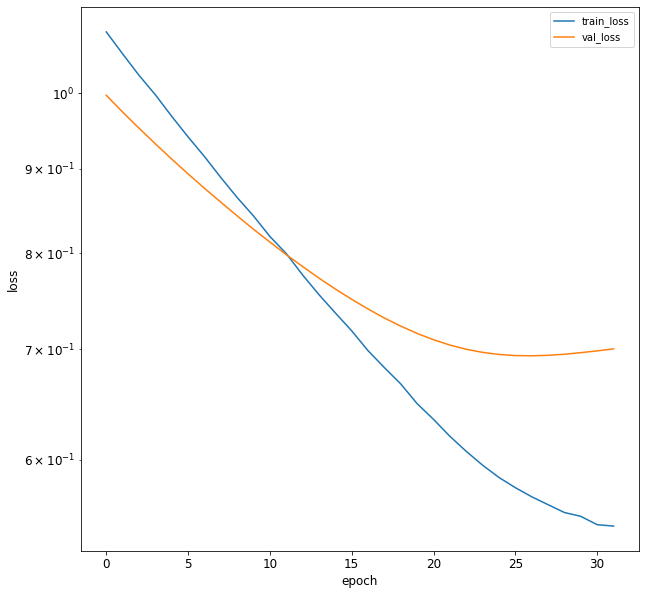

In [33]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [34]:
test = stlf_data.copy()[(stlf_data.index >= 8354) & (stlf_data.index<= 8565)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8354,1724.0,17.742452,90.436797,1.0,3.0,1.0,1863.0,1926.0,1971.0,1556.0,1635.0,1806.0,1856.750000
8355,1709.0,16.962452,93.006530,1.0,3.0,1.0,1835.0,1922.0,1940.0,1539.0,1622.0,1789.0,1837.500000
8356,1710.0,16.962452,93.006530,2.0,3.0,1.0,1752.0,1916.0,1909.0,1505.0,1625.0,1778.0,1820.916667
8357,1713.0,16.962452,93.006530,2.0,3.0,1.0,1729.0,1874.0,1891.0,1510.0,1602.0,1757.0,1806.083333
8358,1721.0,16.827452,92.880650,2.0,3.0,1.0,1724.0,1863.0,1926.0,1514.0,1623.0,1735.0,1789.000000
8359,1717.0,16.692451,92.754770,2.0,3.0,1.0,1709.0,1835.0,1922.0,1505.0,1600.0,1710.0,1771.916667
8360,1697.0,16.692451,92.754770,3.0,3.0,1.0,1710.0,1752.0,1916.0,1517.0,1587.0,1705.0,1753.666667
8361,1684.0,16.692451,92.754770,3.0,3.0,1.0,1713.0,1729.0,1874.0,1511.0,1571.0,1716.0,1737.833333
8362,1671.0,16.307452,93.064005,3.0,3.0,1.0,1721.0,1724.0,1863.0,1502.0,1557.0,1719.0,1721.833333
8363,1666.0,15.922452,93.373240,3.0,3.0,1.0,1717.0,1709.0,1835.0,1498.0,1567.0,1717.0,1707.750000


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 8354 to 8565
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    212 non-null    float64
 1   Temp    212 non-null    float64
 2   Hum     212 non-null    float64
 3   A       212 non-null    float64
 4   B       212 non-null    float64
 5   C       212 non-null    float64
 6   D       212 non-null    float64
 7   E       212 non-null    float64
 8   F       212 non-null    float64
 9   G       212 non-null    float64
 10  H       212 non-null    float64
 11  I       212 non-null    float64
 12  J       212 non-null    float64
dtypes: float64(13)
memory usage: 23.2 KB


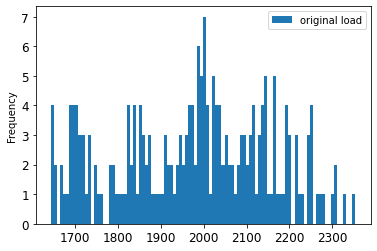

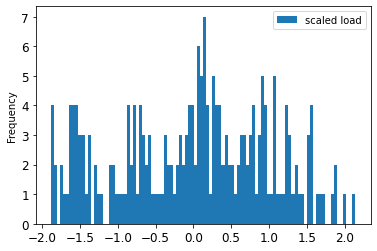

In [36]:
stlf_data[(stlf_data.index >= 8354) & (stlf_data.index <=8565)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[(test.index >=8354) & (test.index <= 8565)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [37]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+100'] = test_shifted['Cons'].shift(-100)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8354,-1.429253,-1.040084,1.307266,-1.498364,-1.004934,0.0,-0.627583,-0.283563,-0.037855,-1.715560,-0.831852,0.308870,-0.720448,-1.202392
8355,-1.514326,-1.203740,1.429646,-1.498364,-1.004934,0.0,-0.785190,-0.306201,-0.214049,-1.800083,-0.902613,0.189161,-0.837186,-1.395224
8356,-1.508654,-1.203740,1.429646,-1.357685,-1.004934,0.0,-1.252379,-0.340158,-0.390243,-1.969130,-0.886283,0.111703,-0.937752,-1.383881
8357,-1.491640,-1.203740,1.429646,-1.357685,-1.004934,0.0,-1.381841,-0.577857,-0.492550,-1.944270,-1.011476,-0.036172,-1.027706,-1.571041
8358,-1.446267,-1.232066,1.423651,-1.357685,-1.004934,0.0,-1.409985,-0.640112,-0.293621,-1.924382,-0.897170,-0.191088,-1.131304,-1.554027
8359,-1.468954,-1.260391,1.417656,-1.357685,-1.004934,0.0,-1.494417,-0.798578,-0.316356,-1.969130,-1.022362,-0.367129,-1.234902,-1.582384
8360,-1.582384,-1.260391,1.417656,-1.217006,-1.004934,0.0,-1.488788,-1.268317,-0.350458,-1.909466,-1.093123,-0.402338,-1.345575,-1.622085
8361,-1.656114,-1.260391,1.417656,-1.217006,-1.004934,0.0,-1.471902,-1.398486,-0.589172,-1.939298,-1.180214,-0.324879,-1.441593,-1.639100
8362,-1.729844,-1.341170,1.432383,-1.217006,-1.004934,0.0,-1.426872,-1.426783,-0.651693,-1.984045,-1.256418,-0.303754,-1.538622,-1.616413
8363,-1.758202,-1.421949,1.447110,-1.217006,-1.004934,0.0,-1.449387,-1.511676,-0.810836,-2.003933,-1.201986,-0.317838,-1.624027,-1.554027


In [38]:
for t in range(1, T+1):
    test_shifted['Cons_t-'+str(T-t)] = test_shifted['Cons'].shift(T-t)
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8354,-1.429253,-1.040084,1.307266,-1.498364,-1.004934,0.0,-0.627583,-0.283563,-0.037855,-1.715560,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.429253
8355,-1.514326,-1.203740,1.429646,-1.498364,-1.004934,0.0,-0.785190,-0.306201,-0.214049,-1.800083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.429253,-1.514326
8356,-1.508654,-1.203740,1.429646,-1.357685,-1.004934,0.0,-1.252379,-0.340158,-0.390243,-1.969130,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.429253,-1.514326,-1.508654
8357,-1.491640,-1.203740,1.429646,-1.357685,-1.004934,0.0,-1.381841,-0.577857,-0.492550,-1.944270,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.429253,-1.514326,-1.508654,-1.491640
8358,-1.446267,-1.232066,1.423651,-1.357685,-1.004934,0.0,-1.409985,-0.640112,-0.293621,-1.924382,...,NaN,NaN,NaN,NaN,NaN,-1.429253,-1.514326,-1.508654,-1.491640,-1.446267
8359,-1.468954,-1.260391,1.417656,-1.357685,-1.004934,0.0,-1.494417,-0.798578,-0.316356,-1.969130,...,NaN,NaN,NaN,NaN,-1.429253,-1.514326,-1.508654,-1.491640,-1.446267,-1.468954
8360,-1.582384,-1.260391,1.417656,-1.217006,-1.004934,0.0,-1.488788,-1.268317,-0.350458,-1.909466,...,NaN,NaN,NaN,-1.429253,-1.514326,-1.508654,-1.491640,-1.446267,-1.468954,-1.582384
8361,-1.656114,-1.260391,1.417656,-1.217006,-1.004934,0.0,-1.471902,-1.398486,-0.589172,-1.939298,...,NaN,NaN,-1.429253,-1.514326,-1.508654,-1.491640,-1.446267,-1.468954,-1.582384,-1.656114
8362,-1.729844,-1.341170,1.432383,-1.217006,-1.004934,0.0,-1.426872,-1.426783,-0.651693,-1.984045,...,NaN,-1.429253,-1.514326,-1.508654,-1.491640,-1.446267,-1.468954,-1.582384,-1.656114,-1.729844
8363,-1.758202,-1.421949,1.447110,-1.217006,-1.004934,0.0,-1.449387,-1.511676,-0.810836,-2.003933,...,-1.429253,-1.514326,-1.508654,-1.491640,-1.446267,-1.468954,-1.582384,-1.656114,-1.729844,-1.758202


In [39]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.tail(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8461,-1.639100,-0.639335,0.126439,-1.076327,0.516823,0.0,-1.550705,-1.256998,-1.123438,-1.253168,...,-1.304479,-1.259107,-1.202392,-1.395224,-1.383881,-1.571041,-1.554027,-1.582384,-1.622085,-1.639100
8462,-1.616413,-0.797747,0.307008,-1.076327,0.516823,0.0,-1.533819,-1.200403,-1.021132,-1.278028,...,-1.259107,-1.202392,-1.395224,-1.383881,-1.571041,-1.554027,-1.582384,-1.622085,-1.639100,-1.616413
8463,-1.554027,-0.956158,0.487577,-1.076327,0.516823,0.0,-1.561962,-1.392826,-1.083652,-1.218364,...,-1.202392,-1.395224,-1.383881,-1.571041,-1.554027,-1.582384,-1.622085,-1.639100,-1.616413,-1.554027
8464,-1.588056,-0.956158,0.487577,-0.935648,0.516823,0.0,-1.601364,-1.381507,-1.316683,-1.268084,...,-1.395224,-1.383881,-1.571041,-1.554027,-1.582384,-1.622085,-1.639100,-1.616413,-1.554027,-1.588056
8465,-1.605070,-0.956158,0.487577,-0.935648,0.516823,0.0,-1.618250,-1.568271,-1.271214,-1.253168,...,-1.383881,-1.571041,-1.554027,-1.582384,-1.622085,-1.639100,-1.616413,-1.554027,-1.588056,-1.605070


In [40]:
y_test = test_shifted[['y_t+100']]
y_test

,y_t+100
8364,-1.588056
8365,-1.605070
8366,-1.542684
8367,-1.480297
8368,-1.298808
...,...
8461,-0.913143
8462,-0.691954
8463,-0.629567
8464,-0.606881


In [41]:
X_test = test_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8364,-1.809246,-1.421949,1.447110,-1.076327,-1.004934,0.0,-1.561962,-1.506017,-1.282581,-2.018849,-1.212872,-0.493879,-1.672036
8365,-1.854618,-1.421949,1.447110,-1.076327,-1.004934,0.0,-1.635137,-1.489038,-1.413305,-2.058625,-1.234645,-0.536129,-1.712464
8366,-1.882975,-1.282422,1.302669,-1.076327,-1.004934,0.0,-1.708311,-1.443762,-1.441724,-1.998961,-1.180214,-0.606546,-1.752893
8367,-1.814917,-1.142894,1.158229,-1.076327,-1.004934,0.0,-1.736455,-1.466400,-1.526979,-2.033765,-1.147555,-0.669920,-1.779677
8368,-1.871632,-1.142894,1.158229,-0.935648,-1.004934,0.0,-1.787114,-1.579590,-1.521295,-2.018849,-1.174770,-0.768504,-1.812020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8461,-1.639100,-0.639335,0.126439,-1.076327,0.516823,0.0,-1.550705,-1.256998,-1.123438,-1.253168,-1.637438,-1.416336,-1.475957
8462,-1.616413,-0.797747,0.307008,-1.076327,0.516823,0.0,-1.533819,-1.200403,-1.021132,-1.278028,-1.572120,-1.345919,-1.530030
8463,-1.554027,-0.956158,0.487577,-1.076327,0.516823,0.0,-1.561962,-1.392826,-1.083652,-1.218364,-1.610222,-1.303669,-1.572986
8464,-1.588056,-0.956158,0.487577,-0.935648,0.516823,0.0,-1.601364,-1.381507,-1.316683,-1.268084,-1.593893,-1.338878,-1.598254


In [42]:
X_test=np.atleast_3d(X_test)
X_test.shape

(102, 13, 1)

In [43]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(102,13,1)

In [44]:
predictions = model.predict(X_test)
predictions

array([[-1.1036892 ],
       [-1.1366801 ],
       [-1.1399165 ],
       [-1.1559167 ],
       [-1.1716726 ],
       [-1.1820531 ],
       [-1.1614025 ],
       [-1.1237404 ],
       [-1.0627618 ],
       [-1.0105219 ],
       [-0.9459201 ],
       [-0.894802  ],
       [-0.8520733 ],
       [-0.790078  ],
       [-0.7221051 ],
       [-0.6199473 ],
       [-0.5339467 ],
       [-0.5025805 ],
       [-0.46182573],
       [-0.33115596],
       [-0.24742241],
       [-0.18421961],
       [-0.09476341],
       [ 0.05578117],
       [ 0.10081989],
       [ 0.08454599],
       [ 0.06530759],
       [ 0.12436423],
       [ 0.11596368],
       [ 0.11654111],
       [ 0.13536382],
       [ 0.16438091],
       [ 0.16855067],
       [ 0.14796592],
       [ 0.1740077 ],
       [ 0.1757224 ],
       [ 0.19458602],
       [ 0.12644659],
       [ 0.13868766],
       [ 0.10659083],
       [ 0.04974312],
       [-0.03172034],
       [ 0.02774487],
       [ 0.03017458],
       [ 0.01083933],
       [ 0

In [45]:
feature=stlf_data.copy()[(stlf_data.index >= 8354) & (stlf_data.index <=8565)][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    1976.004717
dtype: float64
Cons    176.736516
dtype: float64


In [46]:
load_mean=1976.004717
load_std=176.736516
rescaled_target_load=(y_test*load_std)+load_mean
print(rescaled_target_load.shape)


(102, 1)


In [47]:
rescaled_predicted_load=(predictions*load_std)+load_mean
print(rescaled_predicted_load.shape)

(102, 1)


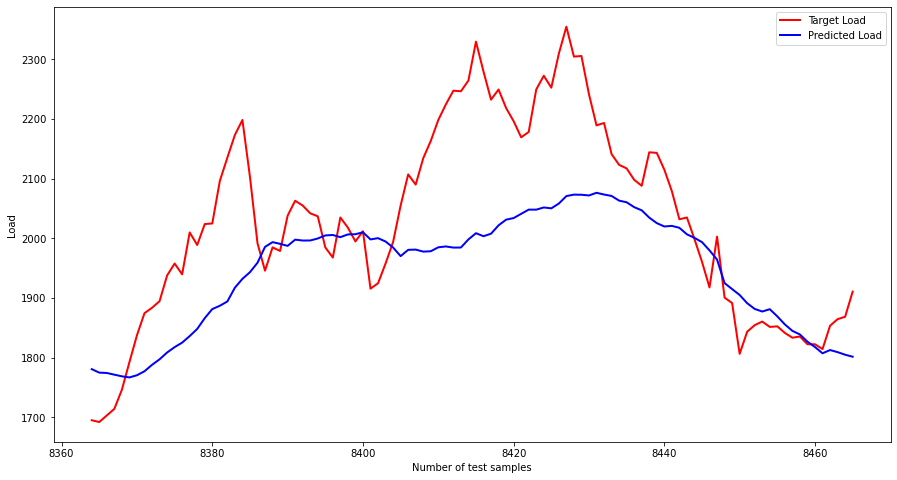

In [48]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [49]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

4.876390104606055


In [50]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+100    3.743468
dtype: float64


In [51]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

            y_t+100
8364  169428.677189
8365  169128.125010
8366  170231.441113
8367  171334.879642
8368  174544.511086
...             ...
8461  181362.283165
8462  185273.320946
8463  186376.690717
8464  186778.078538
8465  190990.322004

[102 rows x 1 columns]


In [52]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

           y_t+100
8364   7328.277742
8365   6852.801664
8366   5067.121365
8367   3286.705877
8368    504.879042
...            ...
8461     50.293966
8462   1659.850311
8463   3054.946287
8464   4049.154196
8465  11895.443696

[102 rows x 1 columns]
y_t+100    17788.757721
dtype: float64


In [53]:
RMSE=MSE**0.5
print(RMSE)

y_t+100    133.374502
dtype: float64


In [54]:
a=np.array(rescaled_predicted_load)

In [55]:
for i in  range(0,102):
    b=a[i]
    print(b)

[1780.9426]
[1775.1118]
[1774.5399]
[1771.712]
[1768.9275]
[1767.0928]
[1770.7426]
[1777.3988]
[1788.1759]
[1797.4087]
[1808.8262]
[1817.8606]
[1825.4124]
[1836.3691]
[1848.3824]
[1866.4375]
[1881.6368]
[1887.1804]
[1894.3833]
[1917.4774]
[1932.2762]
[1943.4464]
[1959.2566]
[1985.8633]
[1993.8234]
[1990.9471]
[1987.547]
[1997.9845]
[1996.4998]
[1996.6018]
[1999.9285]
[2005.0569]
[2005.7938]
[2002.1558]
[2006.7583]
[2007.0613]
[2010.3953]
[1998.3525]
[2000.516]
[1994.8433]
[1984.7961]
[1970.3986]
[1980.9083]
[1981.3378]
[1977.9204]
[1978.5599]
[1985.1559]
[1986.5962]
[1984.6932]
[1984.7783]
[1998.3971]
[2008.8048]
[2003.7489]
[2007.9542]
[2021.9966]
[2031.4912]
[2034.1685]
[2041.2687]
[2048.3323]
[2048.2544]
[2051.9377]
[2050.4587]
[2058.478]
[2070.9946]
[2073.4436]
[2073.241]
[2072.0525]
[2076.5205]
[2073.5837]
[2071.238]
[2063.3843]
[2060.6084]
[2052.4429]
[2047.1538]
[2034.9215]
[2025.6958]
[2020.0652]
[2021.0544]
[2017.7982]
[2006.9033]
[2001.0228]
[1993.8625]
[1979.9938]
[1964.6768